In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Import general libraries
import pandas as pd
import numpy as np

# Install necessary libraries
!pip install unidecode
!pip install --upgrade gspread gspread-dataframe

# Authenticate and load the sheets
from google.colab import auth
auth.authenticate_user()

from unidecode import unidecode

import gspread
from google.auth import default
from gspread_dataframe import get_as_dataframe

from google.cloud import bigquery

creds, _ = default()
gc = gspread.authorize(creds)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Open the Google Sheets
sheet1_url = 'https://docs.google.com/spreadsheets/d/1F2TVzlKrz4I2hBo0_80sV03oRTdhYxHKs2vkGbf-Q4g/edit?usp=drive_link'
sheet1 = gc.open_by_url(sheet1_url).sheet1

sheet2_url = 'https://docs.google.com/spreadsheets/d/1D4gaU-5xvOLU7xBYbtm2rx8uyzQm6ATb2gGE3etI7cc/edit?usp=drive_link'
sheet2 = gc.open_by_url(sheet2_url).sheet1

sheet3_url = 'https://docs.google.com/spreadsheets/d/18UijBLA_Cn8DAtPT5cNnG9W0zZMaYnAYKR0kAA2Ixq0/edit?usp=drive_link'
sheet3 = gc.open_by_url(sheet3_url).sheet1

ibge_url = 'https://docs.google.com/spreadsheets/d/1MzO0MtZx_QuwjFmFd3jBf0bLoA6opdO3E2AVftNv-t8/edit?usp=drive_link'
ibge = gc.open_by_url(ibge_url).sheet1

ibge_states_url = 'https://docs.google.com/spreadsheets/d/1D6J-9iIeGmDhT2Xzu_XAE2VMLnwghbNPw9SdF90ONWU/edit?usp=drive_link'
ibge_states = gc.open_by_url(ibge_states_url).sheet1

ifgf_url = 'https://docs.google.com/spreadsheets/d/1TN2ykNLOTP7RXmPnL558w3pAJ6dG0vJx2KKTaBrobTY/edit?usp=drive_link'
ifgf = gc.open_by_url(ifgf_url).sheet1

# Convert to DataFrame
df1 = get_as_dataframe(sheet1)
df2 = get_as_dataframe(sheet2)
df3 = get_as_dataframe(sheet3)
ibge = get_as_dataframe(ibge)
ibge_states = get_as_dataframe(ibge_states)
ifgf = get_as_dataframe(ifgf)

In [ ]:
# Inspect data
print(df1.head())

         Município        SAPIEM  \
0    Antônio Prado           SIM   
1          Sarandi           SIM   
2       Santa Rosa  e-comunicado   
3    Arroio Grande           SIM   
4  Bento Gonçalves           SIM   

                           Fez a Reforma com erros  reforma  \
0                                              não      sim   
1                                              não      sim   
2                     Não localizada LCM nem ELOM.      não   
3                                  A Lei é uma LCM      sim   
4  LCM 225/2021 Pensões revogada pela LCM 242/2022  parcial   

                                          Legislação  \
0                                        LCM 59/2024   
1                       LC Nº 115/2020, ELOM 11/2022   
2                                  LEI Nº 5.581/2020   
3                   ELOM 13/2020 e LEI Nº 3.139/2020   
4  ELOM 26/2022 e LCM 242/2022 e LCM 225/2021(pen...   

  Vigência (Coluna Principal da Tabela)  OBS  
0                   

In [ ]:
print(df2.head())

    Município                    CRP Tempestividade DRAA  \
0  ÁGUA SANTA  ATENDIDO PARCIALMENTE            ATENDIDO   
1       AGUDO           NÃO ATENDIDO            ATENDIDO   
2   AJURICABA  ATENDIDO PARCIALMENTE            ATENDIDO   
3     ALECRIM           NÃO ATENDIDO            ATENDIDO   
4    ALEGRETE           NÃO ATENDIDO            ATENDIDO   

          Contabilização Enquadramento        Ativos Passivo Atuarial  \
0  ATENDIDO PARCIALMENTE      ATENDIDO    27901042.7      42026561.53   
1               ATENDIDO  NÃO ATENDIDO   61683788.38     172077022.99   
2           NÃO ATENDIDO      ATENDIDO    6632833.14      28219355.93   
3  ATENDIDO PARCIALMENTE      ATENDIDO   14218582.89      55779460.58   
4  ATENDIDO PARCIALMENTE  NÃO ATENDIDO  352355199.75     858006931.44   

      Resultado                                 Evolução   Pl. Amort.  \
0  -13560058.81  Apresenta deficit atuarial decrescente   13810741.54   
1 -108334625.82  Apresenta deficit atuarial decrescent

In [ ]:
print(df3)

           ENTE FEDERATIVO  UF       Porte Alteração em emenda à LO ou EC  \
0     Abadia de Goiás - GO  GO  Municípios                            SIM   
1           Abadiânia - GO  GO  Municípios                            NÃO   
2          Abaetetuba - PA  PA  Municípios                            NÃO   
3         Abreulândia - TO  TO  Municípios                            NÃO   
4          Açailândia - MA  MA  Municípios                            SIM   
...                    ...  ..         ...                            ...   
2152      Votuporanga - SP  SP  Municípios                            NÃO   
2153   Wenceslau Braz - PR  PR  Municípios                            NÃO   
2154           Xambrê - PR  PR  Municípios                            NÃO   
2155        Xangri-lá - RS  RS  Municípios                            NÃO   
2156         Zacarias - SP  SP  Municípios                            NÃO   

     Tipo de reforma                                      NORMAS LEGAIS  \


In [ ]:
print(ibge.head())

   UF   Nome_UF  Região Geográfica Intermediária  \
0  11  Rondônia                             1102   
1  11  Rondônia                             1102   
2  11  Rondônia                             1101   
3  11  Rondônia                             1102   
4  11  Rondônia                             1101   

  Nome Região Geográfica Intermediária  Região Geográfica Imediata  \
0                            Ji-Paraná                      110005   
1                            Ji-Paraná                      110005   
2                          Porto Velho                      110002   
3                            Ji-Paraná                      110004   
4                          Porto Velho                      110002   

  Nome Região Geográfica Imediata  Mesorregião Geográfica   Nome_Mesorregião  \
0                          Cacoal                       2  Leste Rondoniense   
1                          Cacoal                       2  Leste Rondoniense   
2                       Ar

In [ ]:
print(ibge_states.head())

     Estado Sigla  Código IBGE
0      Acre    AC         12.0
1   Alagoas    AL         27.0
2     Amapá    AP         16.0
3  Amazonas    AM         13.0
4     Bahia    BA         29.0


In [ ]:
# Convert Código IBGE to match the format in ibge
ibge_states['Código IBGE'] = ibge_states['Código IBGE'].astype(int).astype(str)
ibge['UF'] = ibge['UF'].astype(int).astype(str)

# Merge ibge with ibge_states
merged_ibge = pd.merge(ibge, ibge_states[['Código IBGE', 'Sigla']], left_on='UF', right_on='Código IBGE', how='left')

# Substitute UF with Sigla
merged_ibge['UF'] = merged_ibge['Sigla']

# Drop unnecessary columns
ibge = merged_ibge.drop(columns=['Sigla', 'Código IBGE'])

# Display the final DataFrame
print(ibge)

      UF           Nome_UF  Região Geográfica Intermediária  \
0     RO          Rondônia                             1102   
1     RO          Rondônia                             1102   
2     RO          Rondônia                             1101   
3     RO          Rondônia                             1102   
4     RO          Rondônia                             1101   
...   ..               ...                              ...   
5565  GO             Goiás                             5201   
5566  GO             Goiás                             5202   
5567  GO             Goiás                             5206   
5568  GO             Goiás                             5205   
5569  DF  Distrito Federal                             5301   

     Nome Região Geográfica Intermediária  Região Geográfica Imediata  \
0                               Ji-Paraná                      110005   
1                               Ji-Paraná                      110005   
2                       

In [ ]:
# Step 1: Filter out rows where Porte is 'Estados'
df3_filtered = df3[df3['Porte'] != 'Estados']

# Step 2: Clean the city names
# Remove text within parentheses and trailing spaces
df3_filtered['City'] = df3_filtered['ENTE FEDERATIVO'].str.replace(r'\s*\(.*?\)\s*', '', regex=True)
# Remove state code suffix
df3_filtered['City'] = df3_filtered['City'].str.replace(r' - \w{2}$', '', regex=True)
# Remove additional text patterns
df3_filtered['City'] = df3_filtered['City'].str.replace(r'antigo\s*', '', regex=True, case=False)
df3_filtered['City'] = df3_filtered['City'].str.replace(r'novo\s*rpps\s*', '', regex=True, case=False)
# Trim leading and trailing spaces
df3_filtered['City'] = df3_filtered['City'].str.strip()

# Step 3: Normalize strings for case and accents
df3_filtered['City_normalized'] = df3_filtered['City'].apply(lambda x: unidecode(str(x)).lower())
ibge['Nome_Município_normalized'] = ibge['Nome_Município'].apply(lambda x: unidecode(str(x)).lower())

# Step 4: Merge df3 and ibge on the normalized city names and state codes
merged_df = pd.merge(df3_filtered, ibge, left_on=['City_normalized', 'UF'], right_on=['Nome_Município_normalized', 'UF'], how='left')

# Step 5: Identify unmatched rows
unmatched_rows = merged_df[merged_df['Nome_Município'].isna()]

# Keep only the necessary columns
final_df = merged_df[['IBGE_code', 'UF', 'City', 'Tipo de reforma']]

# Display the final DataFrame
print(final_df)

# Display the rows that did not merge properly
print("Unmatched rows:")
print(unmatched_rows)

      IBGE_code  UF             City Tipo de reforma
0       5200050  GO  Abadia de Goiás           AMPLA
1       5200100  GO        Abadiânia             NÃO
2       1500107  PA       Abaetetuba             NÃO
3       1700251  TO      Abreulândia             NÃO
4       2100055  MA       Açailândia           AMPLA
...         ...  ..              ...             ...
2125    3557105  SP      Votuporanga             NÃO
2126    4128500  PR   Wenceslau Braz             NÃO
2127    4128807  PR           Xambrê             NÃO
2128    4323804  RS        Xangri-lá             NÃO
2129    3557154  SP         Zacarias             NÃO

[2130 rows x 4 columns]
Unmatched rows:
Empty DataFrame
Columns: [ENTE FEDERATIVO, UF, Porte, Alteração em emenda à LO ou EC, Tipo de reforma, NORMAS LEGAIS, Possui Legislação?, NORMAS LEGAIS.1, City, City_normalized, Nome_UF, Região Geográfica Intermediária, Nome Região Geográfica Intermediária, Região Geográfica Imediata, Nome Região Geográfica Imediata, Meso

<ipython-input-72-f045bda28f07>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3_filtered['City'] = df3_filtered['ENTE FEDERATIVO'].str.replace(r'\s*\(.*?\)\s*', '', regex=True)
<ipython-input-72-f045bda28f07>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3_filtered['City'] = df3_filtered['City'].str.replace(r' - \w{2}$', '', regex=True)
<ipython-input-72-f045bda28f07>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

In [ ]:
# Open the Google Sheets
sheet19_url = 'https://docs.google.com/spreadsheets/d/19dOkwuchBAoVm8J4msyilxW7xAs-uqk_KRyNmWtbQyw/edit?usp=drive_link'
sheet19 = gc.open_by_url(sheet19_url).sheet1

sheet20_url = 'https://docs.google.com/spreadsheets/d/16mflwVymVTSzSEZwUspy4RdP6hu7Y6Drh7vi6_NFyYc/edit?usp=drive_link'
sheet20 = gc.open_by_url(sheet20_url).sheet1

sheet21_url = 'https://docs.google.com/spreadsheets/d/1uj5EAUJqp-lFjxbIzRMt6v9x0yerjOr0oCP7VAAwoTk/edit?usp=drive_link'
sheet21 = gc.open_by_url(sheet21_url).sheet1

# Convert to DataFrame
df2019 = get_as_dataframe(sheet19)
df2020 = get_as_dataframe(sheet20)
df2021 = get_as_dataframe(sheet21)

In [ ]:
print(df2019)

                      ENTE  UF REGIÃO          GRUPO          SUBGRUPO  \
0     ABADIA DE GOIÁS - GO  GO     CO  PEQUENO PORTE  MENOR MATURIDADE   
1           ABADIÂNIA - GO  GO     CO  PEQUENO PORTE  MENOR MATURIDADE   
2          ABAETETUBA - PA  PA      N    MÉDIO PORTE  MENOR MATURIDADE   
3         ABREULÂNDIA - TO  TO      N  PEQUENO PORTE  MENOR MATURIDADE   
4          AÇAILÂNDIA - MA  MA     NE    MÉDIO PORTE  MENOR MATURIDADE   
...                    ...  ..    ...            ...               ...   
2133      VOTUPORANGA - SP  SP     SE    MÉDIO PORTE  MENOR MATURIDADE   
2134   WENCESLAU BRAZ - PR  PR      S    MÉDIO PORTE  MAIOR MATURIDADE   
2135           XAMBRÊ - PR  PR      S  PEQUENO PORTE  MAIOR MATURIDADE   
2136        XANGRI-LÁ - RS  RS      S    MÉDIO PORTE  MENOR MATURIDADE   
2137         ZACARIAS - SP  SP     SE  PEQUENO PORTE  MENOR MATURIDADE   

      REGULARIDADE  INFORMAÇÕES GESTÃO TRANSPARÊNCIA  SUFICIÊNCIA  \
0           0.4976         1.00      C    

In [ ]:
# Renaming columns such that they inform which year the indices are related

def rename_columns(df, year):
    new_columns = {}
    for i in range(5, 16):  # Columns 6 to 16 are indices 5 to 15
        new_columns[df.columns[i]] = f"{df.columns[i]}_{year}"
    df.rename(columns=new_columns, inplace=True)
    return df

# Rename columns for each DataFrame
df2019 = rename_columns(df2019, '2019')
df2020 = rename_columns(df2020, '2020')
df2021 = rename_columns(df2021, '2021')

# Display the updated DataFrames
print("df2019 columns:", df2019.columns)
print("df2020 columns:", df2020.columns)
print("df2021 columns:", df2021.columns)

df2019 columns: Index(['ENTE', 'UF', 'REGIÃO', 'GRUPO', 'SUBGRUPO', 'REGULARIDADE_2019',
       'INFORMAÇÕES_2019', 'GESTÃO_2019', 'TRANSPARÊNCIA_2019',
       'SUFICIÊNCIA_2019', 'ACUMULAÇÃO_RECURSOS_2019', 'LIQUIDEZ_2019',
       'COBERTURA_PREVIDENCIÁRIA_2019', 'ATUÁRIA_2019', 'ISP_2019',
       'PERFIL_2019'],
      dtype='object')
df2020 columns: Index(['ENTE', 'UF', 'REGIÃO', 'GRUPO', 'SUBGRUPO', 'REGULARIDADE_2020',
       'INFORMAÇÕES_2020', 'GESTÃO_2020', 'TRANSPARÊNCIA_2020',
       'SUFICIÊNCIA_2020', 'ACUMULAÇÃO_RECURSOS_2020', 'LIQUIDEZ_2020',
       'COBERTURA_PREVIDENCIÁRIA_2020', 'ATUÁRIA_2020', 'ISP_2020',
       'PERFIL_2020'],
      dtype='object')
df2021 columns: Index(['ENTE', 'UF', 'REGIÃO', 'GRUPO', 'SUBGRUPO', 'REGULARIDADE_2021',
       'INFORMAÇÕES_2021', 'GESTÃO_2021', 'TRANSPARÊNCIA_2021',
       'SUFICIÊNCIA_2021', 'ACUMULAÇÃO_RECURSOS_2021', 'LIQUIDEZ_2021',
       'COBERTURA_PREVIDENCIÁRIA_2021', 'ATUÁRIA_2021', 'ISP_2021',
       'PERFIL_2021'],
      dt

In [ ]:
# Remove text within parentheses and trailing spaces
df2019['ENTE'] = df2019['ENTE'].str.replace(r'\s*\(.*?\)\s*', '', regex=True)
df2020['ENTE'] = df2020['ENTE'].str.replace(r'\s*\(.*?\)\s*', '', regex=True)
df2021['ENTE'] = df2021['ENTE'].str.replace(r'\s*\(.*?\)\s*', '', regex=True)
# Remove state code suffix
df2019['ENTE'] = df2019['ENTE'].str.replace(r' - \w{2}$', '', regex=True)
df2020['ENTE'] = df2020['ENTE'].str.replace(r' - \w{2}$', '', regex=True)
df2021['ENTE'] = df2021['ENTE'].str.replace(r' - \w{2}$', '', regex=True)
# Trim leading and trailing spaces
df2019['ENTE'] = df2019['ENTE'].str.strip()
df2020['ENTE'] = df2020['ENTE'].str.strip()
df2021['ENTE'] = df2021['ENTE'].str.strip()

# Normalize strings for case and accents
df2019.loc[:, 'City_normalized'] = df2019['ENTE'].apply(lambda x: unidecode(str(x)).lower())
df2020.loc[:, 'City_normalized'] = df2020['ENTE'].apply(lambda x: unidecode(str(x)).lower())
df2021.loc[:, 'City_normalized'] = df2021['ENTE'].apply(lambda x: unidecode(str(x)).lower())
final_df.loc[:, 'City_normalized'] = final_df['City'].apply(lambda x: unidecode(str(x)).lower())

# Merge df2019 and final_df on the normalized city names and state codes
merged_df = pd.merge(final_df, df2019, left_on=['City_normalized', 'UF'], right_on=['City_normalized', 'UF'], how='left')
merged_df.drop(columns=['REGIÃO','GRUPO','SUBGRUPO'], inplace=True)

merged_df = pd.merge(merged_df, df2020, left_on=['City_normalized', 'UF'], right_on=['City_normalized', 'UF'], how='left')
merged_df.drop(columns=['REGIÃO','GRUPO','SUBGRUPO'], inplace=True)

df = pd.merge(merged_df, df2021, left_on=['City_normalized', 'UF'], right_on=['City_normalized', 'UF'], how='left')
df.drop(columns=['REGIÃO','GRUPO','SUBGRUPO'], inplace=True)

<ipython-input-76-58267a5d3a57>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df.loc[:, 'City_normalized'] = final_df['City'].apply(lambda x: unidecode(str(x)).lower())


In [ ]:
# Step 5: Identify unmatched rows
unmatched_rows = df[df[['ENTE', 'ENTE_x', 'ENTE_y']].isna().any(axis=1)]

# Display the rows that did not merge properly
print("Unmatched rows:")
print(unmatched_rows)

Unmatched rows:
      IBGE_code  UF                  City Tipo de reforma  \
214     2201572  PI        Belém do Piauí           AMPLA   
289     2904605  BA               BRUMADO             NÃO   
376     3111408  MG         CAMPO FLORIDO             NÃO   
414     4304655  RS         Capão do Cipó             NÃO   
503     2202711  PI        COCAL DE TELHA             NÃO   
563     1706001  TO       Couto Magalhães             NÃO   
571     3120300  MG             Cristália             NÃO   
638     2403301  RN               ENCANTO           AMPLA   
704     4308300  RS       Fontoura Xavier             NÃO   
810     3519303  SP                 Ibaté             NÃO   
884     3132008  MG            Itacambira             NÃO   
971     5104906  MT               Jangada             NÃO   
984     2405702  RN      Jardim do Seridó           AMPLA   
1094    3139003  MG               Machado         PARCIAL   
1105    3139250  MG               Mamonas             NÃO   
1151    

In [ ]:
ifgf.head()

,IBGE_code,UF,Município,IFGF2019,IFGF2020,IFGF2021,IFGF2022,IFGFPessoal2020,IFGFPessoal2021,IFGFPessoal2022,IFGF,IFGFPessoal
0,110001,RO,Alta Floresta D'Oeste,0.3992,0.3985,0.5763,0.7408,0.1751,0.4121,1,0.528700,0.529067
1,110002,RO,Ariquemes,0.667,0.785,0.6692,0.6398,0.9896,0.4818,0.4538,0.690250,0.641733
2,110003,RO,Cabixi,0.7331,0.8038,0.8378,0.7976,0.4012,0.9301,0.8488,0.793075,0.726700
3,110004,RO,Cacoal,0.7011,0.7863,0.6676,0.6535,0.4907,0.3963,0.4353,0.702125,0.440767
4,110005,RO,Cerejeiras,0.5438,0.6365,0.7615,0.8685,0.6954,0.8697,0.8352,0.702575,0.800100


In [ ]:
df.head()

,IBGE_code,UF,City,Tipo de reforma,City_normalized,ENTE_x,REGULARIDADE_2019,INFORMAÇÕES_2019,GESTÃO_2019,TRANSPARÊNCIA_2019,...,INFORMAÇÕES_2021,GESTÃO_2021,TRANSPARÊNCIA_2021,SUFICIÊNCIA_2021,ACUMULAÇÃO_RECURSOS_2021,LIQUIDEZ_2021,COBERTURA_PREVIDENCIÁRIA_2021,ATUÁRIA_2021,ISP_2021,PERFIL_2021
0,5200050,GO,Abadia de Goiás,AMPLA,abadia de goias,ABADIA DE GOIÁS,0.4976,1.00,C,C,...,1.0,C,C,2.0078,2.7612,A,0.3609,C,C,II
1,5200100,GO,Abadiânia,NÃO,abadiania,ABADIÂNIA,0.6290,0.75,C,C,...,0.8,C,C,0.6737,0.0893,C,0.0000,C,D,I
2,1500107,PA,Abaetetuba,NÃO,abaetetuba,ABAETETUBA,0.4081,0.50,C,C,...,0.8,C,C,0.0000,0.0000,C,0.0000,C,D,I
3,1700251,TO,Abreulândia,NÃO,abreulandia,ABREULÂNDIA,0.0959,1.00,C,C,...,1.0,C,B,2.2276,1.1526,B,0.1873,C,C,II
4,2100055,MA,Açailândia,AMPLA,acailandia,AÇAILÂNDIA,0.8276,0.75,C,C,...,1.0,C,B,1.8392,0.9916,B,0.2850,C,C,II


In [ ]:
# Ensure the IBGE_code column is a string
df['IBGE_code'] = df['IBGE_code'].astype(str)

# Create a temporary column in df with only the first six digits of IBGE_code and convert it to an integer
df['IBGE_code_temp'] = df['IBGE_code'].str[:6].astype(int)

# Perform the merge
df = df.merge(ifgf[['IBGE_code', 'IFGF', 'IFGFPessoal']], left_on='IBGE_code_temp', right_on='IBGE_code', how='inner')

# Drop the temporary column if not needed anymore
df = df.drop(columns=['IBGE_code_temp', 'IBGE_code_y'])  # Drop the extra IBGE_code from ifgf if not needed

# rename columns
df = df.rename(columns={'IBGE_code_x': 'IBGE_code'})

# Ensure the IBGE_code column is back as int
df['IBGE_code'] = df['IBGE_code'].astype(int)

In [ ]:
print(df.columns)

Index(['IBGE_code', 'UF', 'City', 'Tipo de reforma', 'City_normalized',
       'ENTE_x', 'REGULARIDADE_2019', 'INFORMAÇÕES_2019', 'GESTÃO_2019',
       'TRANSPARÊNCIA_2019', 'SUFICIÊNCIA_2019', 'ACUMULAÇÃO_RECURSOS_2019',
       'LIQUIDEZ_2019', 'COBERTURA_PREVIDENCIÁRIA_2019', 'ATUÁRIA_2019',
       'ISP_2019', 'PERFIL_2019', 'ENTE_y', 'REGULARIDADE_2020',
       'INFORMAÇÕES_2020', 'GESTÃO_2020', 'TRANSPARÊNCIA_2020',
       'SUFICIÊNCIA_2020', 'ACUMULAÇÃO_RECURSOS_2020', 'LIQUIDEZ_2020',
       'COBERTURA_PREVIDENCIÁRIA_2020', 'ATUÁRIA_2020', 'ISP_2020',
       'PERFIL_2020', 'ENTE', 'REGULARIDADE_2021', 'INFORMAÇÕES_2021',
       'GESTÃO_2021', 'TRANSPARÊNCIA_2021', 'SUFICIÊNCIA_2021',
       'ACUMULAÇÃO_RECURSOS_2021', 'LIQUIDEZ_2021',
       'COBERTURA_PREVIDENCIÁRIA_2021', 'ATUÁRIA_2021', 'ISP_2021',
       'PERFIL_2021', 'IFGF', 'IFGFPessoal'],
      dtype='object')


In [ ]:
df['Tipo de reforma'].unique()

array(['AMPLA', 'NÃO', 'PARCIAL'], dtype=object)

In [ ]:
# Setting up the BigQuery credential

auth.authenticate_user()
project_id = "phd-dissertation-343113"
!gcloud config set project {project_id}

Updated property [core/project].


In [ ]:
# Getting age and income data

# Set up the BigQuery client
client = bigquery.Client(project=project_id)

# Define the query
query = """
WITH avg_values AS (
  SELECT
    id_municipio,
    AVG(v6036) AS avg_age,
    AVG(v6532) AS avg_household_income_per_capita,
    AVG(v6591) AS avg_total_income,
    AVG(v5080) AS avg_family_income_per_capita
  FROM
    `basedosdados.br_ibge_censo_demografico.microdados_pessoa_2010`
  GROUP BY
    id_municipio
),
proportions AS (
  SELECT
    id_municipio,
    COUNTIF(v6036 > 65) / COUNT(*) AS proportion_over_65
  FROM
    `basedosdados.br_ibge_censo_demografico.microdados_pessoa_2010`
  GROUP BY
    id_municipio
),
avg_pension AS (
  SELECT
    id_municipio,
    AVG(CASE WHEN v6036 > 65 THEN v6591 ELSE NULL END) AS avg_income_pension_over_65
  FROM
    `basedosdados.br_ibge_censo_demografico.microdados_pessoa_2010`
  GROUP BY
    id_municipio
),
population AS (
  SELECT
    id_municipio,
    populacao
  FROM
    `basedosdados.br_ibge_populacao.municipio`
  WHERE ano = 2020
),
civil_service_data AS (
  SELECT
    id_municipio,
    SUM(CASE
          WHEN tipo_vinculo = 'Estatutários' THEN quantidade_vinculo
          ELSE 0
        END) AS civil_service,
    SUM(CASE
          WHEN tipo_vinculo IN ('Celetistas', 'Somente comissionados', 'Sem vínculo permanente') THEN quantidade_vinculo
          ELSE 0
        END) AS other_employees
  FROM
    `basedosdados.br_ibge_munic.indicadores_quantidade_vinculo`
  WHERE escolaridade = 'Total'
    AND ano = (SELECT MAX(ano) FROM `basedosdados.br_ibge_munic.indicadores_quantidade_vinculo`)
  GROUP BY
    id_municipio
)
SELECT
  avg_values.id_municipio,
  avg_values.avg_age,
  avg_values.avg_household_income_per_capita,
  avg_values.avg_total_income,
  avg_values.avg_family_income_per_capita,
  proportions.proportion_over_65,
  avg_pension.avg_income_pension_over_65,
  population.populacao,
  civil_service_data.civil_service,
  civil_service_data.civil_service / population.populacao AS share_civil_service,
  civil_service_data.other_employees,
  civil_service_data.other_employees / population.populacao AS share_other_employees
FROM
  avg_values
JOIN
  proportions ON avg_values.id_municipio = proportions.id_municipio
JOIN
  avg_pension ON avg_values.id_municipio = avg_pension.id_municipio
JOIN
  population ON avg_values.id_municipio = population.id_municipio
JOIN
  civil_service_data ON avg_values.id_municipio = civil_service_data.id_municipio
"""

# Execute the query and store the results in a dataframe
query_result = client.query(query).to_dataframe()

# Convert 'id_municipio' to int64
query_result['id_municipio'] = query_result['id_municipio'].astype('int64')

# Merge the query result with "df" dataframe
df = pd.merge(df, query_result, left_on='IBGE_code', right_on='id_municipio')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2130 entries, 0 to 2129
Data columns (total 55 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   IBGE_code                        2130 non-null   int64  
 1   UF                               2130 non-null   object 
 2   City                             2130 non-null   object 
 3   Tipo de reforma                  2130 non-null   object 
 4   City_normalized                  2130 non-null   object 
 5   ENTE_x                           2110 non-null   object 
 6   REGULARIDADE_2019                2110 non-null   float64
 7   INFORMAÇÕES_2019                 2110 non-null   float64
 8   GESTÃO_2019                      2110 non-null   object 
 9   TRANSPARÊNCIA_2019               2110 non-null   object 
 10  SUFICIÊNCIA_2019                 2110 non-null   float64
 11  ACUMULAÇÃO_RECURSOS_2019         2110 non-null   float64
 12  LIQUIDEZ_2019       

In [ ]:
df.columns

Index(['IBGE_code', 'UF', 'City', 'Tipo de reforma', 'City_normalized',
       'ENTE_x', 'REGULARIDADE_2019', 'INFORMAÇÕES_2019', 'GESTÃO_2019',
       'TRANSPARÊNCIA_2019', 'SUFICIÊNCIA_2019', 'ACUMULAÇÃO_RECURSOS_2019',
       'LIQUIDEZ_2019', 'COBERTURA_PREVIDENCIÁRIA_2019', 'ATUÁRIA_2019',
       'ISP_2019', 'PERFIL_2019', 'ENTE_y', 'REGULARIDADE_2020',
       'INFORMAÇÕES_2020', 'GESTÃO_2020', 'TRANSPARÊNCIA_2020',
       'SUFICIÊNCIA_2020', 'ACUMULAÇÃO_RECURSOS_2020', 'LIQUIDEZ_2020',
       'COBERTURA_PREVIDENCIÁRIA_2020', 'ATUÁRIA_2020', 'ISP_2020',
       'PERFIL_2020', 'ENTE', 'REGULARIDADE_2021', 'INFORMAÇÕES_2021',
       'GESTÃO_2021', 'TRANSPARÊNCIA_2021', 'SUFICIÊNCIA_2021',
       'ACUMULAÇÃO_RECURSOS_2021', 'LIQUIDEZ_2021',
       'COBERTURA_PREVIDENCIÁRIA_2021', 'ATUÁRIA_2021', 'ISP_2021',
       'PERFIL_2021', 'IFGF', 'IFGFPessoal', 'id_municipio', 'avg_age',
       'avg_household_income_per_capita', 'avg_total_income',
       'avg_family_income_per_capita', 'proport

In [ ]:
df['REGULARIDADE_2021'].fillna(0, inplace=True)

In [ ]:
df[['COBERTURA_PREVIDENCIÁRIA_2019','COBERTURA_PREVIDENCIÁRIA_2020','REGULARIDADE_2021']].astype('float64')

,COBERTURA_PREVIDENCIÁRIA_2019,COBERTURA_PREVIDENCIÁRIA_2020,REGULARIDADE_2021
0,0.3938,0.3338,0.0000
1,0.0000,0.0000,0.5878
2,0.0000,0.0000,0.0000
3,0.1825,0.2050,0.8631
4,0.0000,0.4222,0.7333
...,...,...,...
2125,0.4863,0.4336,0.9333
2126,0.2288,0.0000,0.3885
2127,0.1816,0.2244,0.8525
2128,0.2189,0.3033,0.8667


In [ ]:
# First logit model

model1 = df[['IBGE_code','City','Tipo de reforma','REGULARIDADE_2019','INFORMAÇÕES_2019',
       'SUFICIÊNCIA_2019','ACUMULAÇÃO_RECURSOS_2019','COBERTURA_PREVIDENCIÁRIA_2019',
       'ISP_2019','avg_age','avg_household_income_per_capita','avg_income_pension_over_65',
       'populacao','share_civil_service','share_other_employees','IFGF','IFGFPessoal']]

In [ ]:
model1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2130 entries, 0 to 2129
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   IBGE_code                        2130 non-null   int64  
 1   City                             2130 non-null   object 
 2   Tipo de reforma                  2130 non-null   object 
 3   REGULARIDADE_2019                2110 non-null   float64
 4   INFORMAÇÕES_2019                 2110 non-null   float64
 5   SUFICIÊNCIA_2019                 2110 non-null   float64
 6   ACUMULAÇÃO_RECURSOS_2019         2110 non-null   float64
 7   COBERTURA_PREVIDENCIÁRIA_2019    2110 non-null   float64
 8   ISP_2019                         2110 non-null   object 
 9   avg_age                          2130 non-null   float64
 10  avg_household_income_per_capita  2130 non-null   float64
 11  avg_income_pension_over_65       2130 non-null   float64
 12  populacao           

In [ ]:
# droppin NANs
model1 = model1.dropna()

In [ ]:
model1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2086 entries, 0 to 2129
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   IBGE_code                        2086 non-null   int64  
 1   City                             2086 non-null   object 
 2   Tipo de reforma                  2086 non-null   object 
 3   REGULARIDADE_2019                2086 non-null   float64
 4   INFORMAÇÕES_2019                 2086 non-null   float64
 5   SUFICIÊNCIA_2019                 2086 non-null   float64
 6   ACUMULAÇÃO_RECURSOS_2019         2086 non-null   float64
 7   COBERTURA_PREVIDENCIÁRIA_2019    2086 non-null   float64
 8   ISP_2019                         2086 non-null   object 
 9   avg_age                          2086 non-null   float64
 10  avg_household_income_per_capita  2086 non-null   float64
 11  avg_income_pension_over_65       2086 non-null   float64
 12  populacao                

In [ ]:
model1['Tipo de reforma'].unique()

array(['AMPLA', 'NÃO', 'PARCIAL'], dtype=object)

In [ ]:
# Install necessary libraries

!pip install statsmodels pandas

In [ ]:
# Import libraries
import statsmodels.api as sm
from statsmodels.miscmodels.ordinal_model import OrderedModel

In [ ]:
# Encode the 'Tipo de reforma' column as an ordered categorical variable
model1['Tipo de reforma'] = pd.Categorical(model1['Tipo de reforma'], categories=['NÃO', 'PARCIAL', 'AMPLA'], ordered=True)

In [ ]:
# Define the independent variables (excluding the columns you don't want to include in the model)
X = model1[['REGULARIDADE_2019', 'INFORMAÇÕES_2019', 'SUFICIÊNCIA_2019', 'ACUMULAÇÃO_RECURSOS_2019',
            'COBERTURA_PREVIDENCIÁRIA_2019', 'avg_age', 'avg_household_income_per_capita',
            'avg_income_pension_over_65', 'populacao', 'share_civil_service', 'share_other_employees',
            'IFGF','IFGFPessoal']]

# Define the dependent variable
y = model1['Tipo de reforma']

In [ ]:
print(X.dtypes)

REGULARIDADE_2019                  float64
INFORMAÇÕES_2019                   float64
SUFICIÊNCIA_2019                   float64
ACUMULAÇÃO_RECURSOS_2019           float64
COBERTURA_PREVIDENCIÁRIA_2019      float64
avg_age                            float64
avg_household_income_per_capita    float64
avg_income_pension_over_65         float64
populacao                            Int64
share_civil_service                float64
share_other_employees              float64
IFGF                               float64
IFGFPessoal                        float64
dtype: object


In [ ]:
print(y.dtype)

category


In [ ]:
# Convert 'Tipo de reforma' to numeric codes
y_codes = y.cat.codes
print(y.head(10))
print(y_codes.head(10))

0      AMPLA
1        NÃO
2        NÃO
3        NÃO
4      AMPLA
5      AMPLA
6      AMPLA
7    PARCIAL
8      AMPLA
9      AMPLA
Name: Tipo de reforma, dtype: category
Categories (3, object): ['NÃO' < 'PARCIAL' < 'AMPLA']
0    2
1    0
2    0
3    0
4    2
5    2
6    2
7    1
8    2
9    2
dtype: int8


In [ ]:
X = X.apply(pd.to_numeric, errors='coerce')
y_codes = pd.to_numeric(y.cat.codes, errors='coerce')

In [ ]:
# Identify columns in X that are of dtype 'object'
object_columns = X.columns[X.dtypes == 'object']
print("Columns with object dtype:", object_columns)

Columns with object dtype: Index([], dtype='object')


In [ ]:
# Convert X and y_codes to numpy arrays
X_np = np.asarray(X)
y_np = np.asarray(y_codes)

# Ensure that there are no object types in X_np
print(X_np.dtype)  # Should be something like float64
print(y_np.dtype)  # Should be int64 or int32

object
int8


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
print(y.head(5))
print(y_codes.head(5))

0    AMPLA
1      NÃO
2      NÃO
3      NÃO
4    AMPLA
Name: Tipo de reforma, dtype: category
Categories (3, object): ['NÃO' < 'PARCIAL' < 'AMPLA']
0    2
1    0
2    0
3    0
4    2
dtype: int8


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2086 entries, 0 to 2129
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   REGULARIDADE_2019                2086 non-null   float64
 1   INFORMAÇÕES_2019                 2086 non-null   float64
 2   SUFICIÊNCIA_2019                 2086 non-null   float64
 3   ACUMULAÇÃO_RECURSOS_2019         2086 non-null   float64
 4   COBERTURA_PREVIDENCIÁRIA_2019    2086 non-null   float64
 5   avg_age                          2086 non-null   float64
 6   avg_household_income_per_capita  2086 non-null   float64
 7   avg_income_pension_over_65       2086 non-null   float64
 8   populacao                        2086 non-null   Int64  
 9   share_civil_service              2086 non-null   float64
 10  share_other_employees            2086 non-null   float64
 11  IFGF                             2086 non-null   float64
 12  IFGFPessoal              

In [ ]:
from sklearn.preprocessing import StandardScaler

# scaling the features

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X.describe()

,REGULARIDADE_2019,INFORMAÇÕES_2019,SUFICIÊNCIA_2019,ACUMULAÇÃO_RECURSOS_2019,COBERTURA_PREVIDENCIÁRIA_2019,avg_age,avg_household_income_per_capita,avg_income_pension_over_65,populacao,share_civil_service,share_other_employees,IFGF,IFGFPessoal
count,2086.000000,2086.000000,2086.000000,2086.000000,2086.000000,2086.000000,2086.000000,2086.000000,2086.0,2086.000000,2086.000000,2086.000000,2086.000000
mean,0.589873,0.747743,6.407469,1.047554,0.208941,32.019650,1.088011,731.069324,70386.7814,0.030672,0.016096,0.595172,0.656232
std,0.376143,0.304562,188.194866,6.146911,0.269625,3.254612,0.498395,257.573384,353867.919215,0.014932,0.013987,0.182701,0.289134
min,0.000000,0.000000,0.000000,-3.620300,0.000000,21.108461,0.249173,304.617647,776.0,0.000000,0.000000,0.062600,0.000000
25%,0.279575,0.500000,0.570000,0.000000,0.000000,29.894453,0.652388,576.503383,6883.0,0.021091,0.006386,0.474294,0.464667
50%,0.695850,0.750000,1.030000,0.258125,0.064150,31.921544,1.083409,663.736109,17439.5,0.027345,0.012338,0.612600,0.721217
75%,0.939100,1.000000,1.807500,1.104507,0.383550,34.238490,1.385206,799.194518,41993.75,0.036905,0.021634,0.735756,0.900875
max,1.000000,1.000000,8465.450000,249.950920,1.640100,42.706786,3.836660,4521.380952,12325232.0,0.137421,0.131564,0.986750,1.000000


In [ ]:
# Assuming X_scaled is your NumPy array and X is the original DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Now use describe() on the DataFrame
summary = X_scaled_df.describe()

print(summary)


       REGULARIDADE_2019  INFORMAÇÕES_2019  SUFICIÊNCIA_2019  \
count       2.086000e+03      2.086000e+03      2.086000e+03   
mean       -1.634998e-16      7.153115e-17      5.109368e-18   
std         1.000240e+00      1.000240e+00      1.000240e+00   
min        -1.568590e+00     -2.455726e+00     -3.405515e-02   
25%        -8.251444e-01     -8.136329e-01     -3.102565e-02   
50%         2.818135e-01      7.413665e-03     -2.858079e-02   
75%         9.286635e-01      8.284602e-01     -2.444844e-02   
max         1.090609e+00      8.284602e-01      4.495909e+01   

       ACUMULAÇÃO_RECURSOS_2019  COBERTURA_PREVIDENCIÁRIA_2019       avg_age  \
count              2.086000e+03                   2.086000e+03  2.086000e+03   
mean               3.832026e-17                   1.021874e-17  1.021874e-16   
std                1.000240e+00                   1.000240e+00  1.000240e+00   
min               -7.595641e-01                  -7.751179e-01 -3.353335e+00   
25%               -1.70

In [ ]:
import numpy as np

class OrderedLogisticRegression:
    def __init__(self):
        self.models = []

    def fit(self, X, y):
        # Get the unique classes and sort them
        unique_classes = np.sort(np.unique(y))
        for i in range(len(unique_classes) - 1):
            # Create binary target for each threshold
            y_binary = (y > unique_classes[i]).astype(int)
            model = LogisticRegression()
            model.fit(X, y_binary)
            self.models.append(model)

    def predict_proba(self, X):
        probas = []
        for model in self.models:
            probas.append(model.predict_proba(X)[:, 1])
        probas = np.column_stack(probas)
        probas = np.hstack([np.zeros((X.shape[0], 1)), probas, np.ones((X.shape[0], 1))])
        return probas[:, 1:] - probas[:, :-1]

    def predict(self, X):
        return np.argmax(self.predict_proba(X), axis=1)

# Fit the model
ord_log_reg = OrderedLogisticRegression()
ord_log_reg.fit(X_scaled, y_codes)

# Predict
y_pred = ord_log_reg.predict(X_scaled)


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

ord_log_reg = OrderedLogisticRegression()
ord_log_reg.fit(X_scaled, y_codes)

y_pred = ord_log_reg.predict(X_scaled)

# Evaluate again
print("Accuracy:", accuracy_score(y_codes, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_codes, y_pred))


Accuracy: 0.3192713326941515
Confusion Matrix:
 [[ 153    0 1015]
 [  28    0  166]
 [ 211    0  513]]


In [ ]:
# Scale the features for better performance
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit a multinomial logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model.fit(X_scaled, y_codes)

# Get the coefficients
coefficients = model.coef_

# Convert coefficients to a DataFrame for better interpretation
coefficients_df = pd.DataFrame(coefficients, columns=X.columns)
coefficients_df['Class'] = ['NÃO', 'PARCIAL', 'AMPLA']

print("Coefficients:")
print(coefficients_df)


Coefficients:
   REGULARIDADE_2019  INFORMAÇÕES_2019  SUFICIÊNCIA_2019  \
0          -0.031654         -0.079680          0.221258   
1           0.112653          0.079506         -0.334715   
2          -0.081000          0.000174          0.113457   

   ACUMULAÇÃO_RECURSOS_2019  COBERTURA_PREVIDENCIÁRIA_2019   avg_age  \
0                  0.055082                      -0.062789  0.046960   
1                  0.099434                       0.269275 -0.017303   
2                 -0.154516                      -0.206486 -0.029656   

   avg_household_income_per_capita  avg_income_pension_over_65  populacao  \
0                         0.060346                    -0.01581   0.055806   
1                         0.015335                    -0.02503  -0.236118   
2                        -0.075681                     0.04084   0.180312   

   share_civil_service  share_other_employees      IFGF  IFGFPessoal    Class  
0             0.117109              -0.031496  0.221856    -0.05807

In [ ]:
X_scaled

array([[-2.45372640e-01,  8.28460223e-01, -2.48603508e-02, ...,
         1.54715747e+00,  7.87148076e-01,  3.97723436e-01],
       [ 1.04046052e-01,  7.41366469e-03, -2.88465373e-02, ...,
        -1.16531857e-01,  2.45164658e-02,  3.35222926e-01],
       [-4.83370912e-01, -8.13632894e-01, -3.40551543e-02, ...,
        -1.05618690e+00, -1.67552790e+00, -2.27019502e+00],
       ...,
       [ 4.36179954e-01,  7.41366469e-03, -3.40551543e-02, ...,
        -8.20794153e-01, -1.88708674e-02,  9.78563048e-01],
       [ 9.07124021e-01,  8.28460223e-01, -2.03426728e-02, ...,
        -1.15152004e-01,  6.62597687e-01,  3.49343519e-04],
       [ 1.39679313e-01,  7.41366469e-03, -2.55512898e-02, ...,
        -8.39218886e-01,  9.27848955e-01,  4.26552085e-01]])

In [ ]:
odds_ratios = pd.DataFrame(np.exp(coefficients), columns=X.columns)
odds_ratios['Class'] = ['NÃO', 'PARCIAL', 'AMPLA']

print("Odds Ratios:")
print(odds_ratios)

Odds Ratios:
   REGULARIDADE_2019  INFORMAÇÕES_2019  SUFICIÊNCIA_2019  \
0           0.968842          0.923412          1.247645   
1           1.119244          1.082752          0.715542   
2           0.922194          1.000174          1.120143   

   ACUMULAÇÃO_RECURSOS_2019  COBERTURA_PREVIDENCIÁRIA_2019   avg_age  \
0                  1.056627                       0.939142  1.048080   
1                  1.104546                       1.309016  0.982845   
2                  0.856830                       0.813437  0.970779   

   avg_household_income_per_capita  avg_income_pension_over_65  populacao  \
0                         1.062204                    0.984315   1.057393   
1                         1.015453                    0.975280   0.789687   
2                         0.927112                    1.041685   1.197591   

   share_civil_service  share_other_employees      IFGF  IFGFPessoal    Class  
0             1.124242               0.968995  1.248392     0.943575

In [ ]:
import numpy as np
from scipy import stats

# Assuming 'model' is your fitted LogisticRegression model
# Standard errors can be approximated by the square root of the diagonal of the covariance matrix of the coefficients
SE = np.sqrt(np.diag(np.linalg.inv(np.dot(X_scaled.T, X_scaled))))

# Calculate the Wald statistic (z)
z = model.coef_ / SE

# Calculate the p-values using the survival function of the normal distribution (two-tailed)
p_values = 2 * (1 - stats.norm.cdf(np.abs(z)))

# Create a DataFrame to display the p-values
p_values_df = pd.DataFrame(p_values, columns=X.columns)
p_values_df['Class'] = ['NÃO', 'PARCIAL', 'AMPLA']

print("P-values:")
print(p_values_df)

P-values:
   REGULARIDADE_2019  INFORMAÇÕES_2019  SUFICIÊNCIA_2019  \
0           0.290367          0.007064      0.000000e+00   
1           0.000168          0.007190      0.000000e+00   
2           0.006818          0.995301      3.570202e-07   

   ACUMULAÇÃO_RECURSOS_2019  COBERTURA_PREVIDENCIÁRIA_2019   avg_age  \
0              1.372418e-02                   2.238116e-02  0.097136   
1              8.635929e-06                   0.000000e+00  0.541027   
2              4.738876e-12                   5.884182e-14  0.294806   

   avg_household_income_per_capita  avg_income_pension_over_65     populacao  \
0                         0.149197                    0.602100  1.720858e-02   
1                         0.713966                    0.409107  0.000000e+00   
2                         0.070465                    0.178029  1.398881e-14   

   share_civil_service  share_other_employees          IFGF   IFGFPessoal  \
0             0.000002               0.197836  3.074457e-08  8

In [ ]:
# Install rpy2 to enable R code execution in Python
!pip install rpy2

# Activate the R magic to run R code
%load_ext rpy2.ipython

# Convert your Python DataFrame to a CSV file for R
import pandas as pd

# Assuming your dataset is stored in a pandas DataFrame named model1
model1.to_csv('model1.csv', index=False)

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [ ]:
%%R

# Load necessary packages
install.packages("MASS")
install.packages("car")

(as ‘lib’ is unspecified)







	‘/tmp/Rtmp2V9avS/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/Rtmp2V9avS/downloaded_packages’



In [ ]:
%%R
# Load the CSV file into R
model1 <- read.csv('model1.csv')

# Ensure 'Tipo.de.reforma' is a factor with ordered levels
model1$Tipo.de.reforma <- factor(model1$Tipo.de.reforma, levels=c('NÃO', 'PARCIAL', 'AMPLA'), ordered=TRUE)

# Check for missing or infinite values and handle them
# Replace infinite values with NA
model1[model1 == Inf | model1 == -Inf] <- NA

# Remove rows with NA values
model1 <- na.omit(model1)

# Scale and center numeric variables
numeric_columns <- sapply(model1, is.numeric)
model1[numeric_columns] <- scale(model1[numeric_columns])

# Fit the ordinal logistic regression model
library(MASS)
model_fit <- polr(Tipo.de.reforma ~ REGULARIDADE_2019 + INFORMAÇÕES_2019 + SUFICIÊNCIA_2019 +
                  ACUMULAÇÃO_RECURSOS_2019 + COBERTURA_PREVIDENCIÁRIA_2019 + avg_age +
                  avg_household_income_per_capita + avg_income_pension_over_65 +
                  populacao + share_civil_service + share_other_employees + IFGF + IFGFPessoal,
                  data=model1, Hess=TRUE)

# Print the summary of the model (includes coefficients)
print(summary(model_fit))

# Load car package for Anova function
library(car)

# Calculate and display p-values
p_values <- Anova(model_fit)
print("P-values:")
print(p_values)

# Calculate odds ratios and their confidence intervals
odds_ratios <- exp(coef(model_fit))
conf_intervals <- exp(confint(model_fit))

print("Odds Ratios:")
print(odds_ratios)

print("Confidence Intervals for Odds Ratios:")
print(conf_intervals)

Call:
polr(formula = Tipo.de.reforma ~ REGULARIDADE_2019 + INFORMAÇÕES_2019 + 
    SUFICIÊNCIA_2019 + ACUMULAÇÃO_RECURSOS_2019 + COBERTURA_PREVIDENCIÁRIA_2019 + 
    avg_age + avg_household_income_per_capita + avg_income_pension_over_65 + 
    populacao + share_civil_service + share_other_employees + 
    IFGF + IFGFPessoal, data = model1, Hess = TRUE)

Coefficients:
                                    Value Std. Error t value
REGULARIDADE_2019               -0.036996    0.05991 -0.6176
INFORMAÇÕES_2019                 0.061605    0.05885  1.0467
SUFICIÊNCIA_2019                -0.123190    0.36086 -0.3414
ACUMULAÇÃO_RECURSOS_2019        -0.109026    0.10522 -1.0362
COBERTURA_PREVIDENCIÁRIA_2019   -0.042415    0.05609 -0.7562
avg_age                         -0.061512    0.05742 -1.0712
avg_household_income_per_capita -0.136293    0.08574 -1.5896
avg_income_pension_over_65       0.050282    0.06151  0.8174
populacao                        0.136969    0.08268  1.6567
share_civil_service 

[1] "Odds Ratios:"
              REGULARIDADE_2019                INFORMAÇÕES_2019 
                      0.9636804                       1.0635426 
               SUFICIÊNCIA_2019        ACUMULAÇÃO_RECURSOS_2019 
                      0.8840960                       0.8967073 
  COBERTURA_PREVIDENCIÁRIA_2019                         avg_age 
                      0.9584723                       0.9403412 
avg_household_income_per_capita      avg_income_pension_over_65 
                      0.8725866                       1.0515675 
                      populacao             share_civil_service 
                      1.1467926                       0.8367953 
          share_other_employees                            IFGF 
                      1.0083112                       0.8142300 
                    IFGFPessoal 
                      0.9121397 
[1] "Confidence Intervals for Odds Ratios:"
                                    2.5 %    97.5 %
REGULARIDADE_2019               0.85706

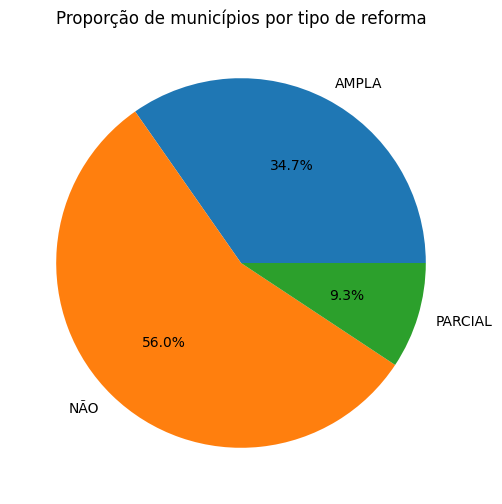

In [ ]:
import matplotlib.pyplot as plt

unique, counts = np.unique(y, return_counts=True)

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(counts, labels=unique, autopct='%1.1f%%', startangle=0)
plt.title('Proporção de municípios por tipo de reforma')
plt.show()

In [ ]:
# Maps

import geopandas as gpd

# Arquivo shape
arquivo_BR_municipios_shapefile = '/content/drive/MyDrive/3 Essay political economy COVID19/Dados/Mapa/BR_Municipios_2019.shp'
geo_df = gpd.read_file(arquivo_BR_municipios_shapefile).rename(columns={'CD_MUN':'IBGE_code'})
# geo_df.set_index('IBGE_code', inplace=True)

In [ ]:
# Merge dfs

geo_df['IBGE_code'] = geo_df['IBGE_code'].astype('int64')

geo_df = geo_df.merge(model1, left_on='IBGE_code', right_on='IBGE_code')
geo_df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2086 entries, 0 to 2085
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   IBGE_code                        2086 non-null   int64   
 1   NM_MUN                           2086 non-null   object  
 2   SIGLA_UF                         2086 non-null   object  
 3   AREA_KM2                         2086 non-null   float64 
 4   geometry                         2086 non-null   geometry
 5   City                             2086 non-null   object  
 6   Tipo de reforma                  2086 non-null   category
 7   REGULARIDADE_2019                2086 non-null   float64 
 8   INFORMAÇÕES_2019                 2086 non-null   float64 
 9   SUFICIÊNCIA_2019                 2086 non-null   float64 
 10  ACUMULAÇÃO_RECURSOS_2019         2086 non-null   float64 
 11  COBERTURA_PREVIDENCIÁRIA_2019    2086 non-null   float64 
 12

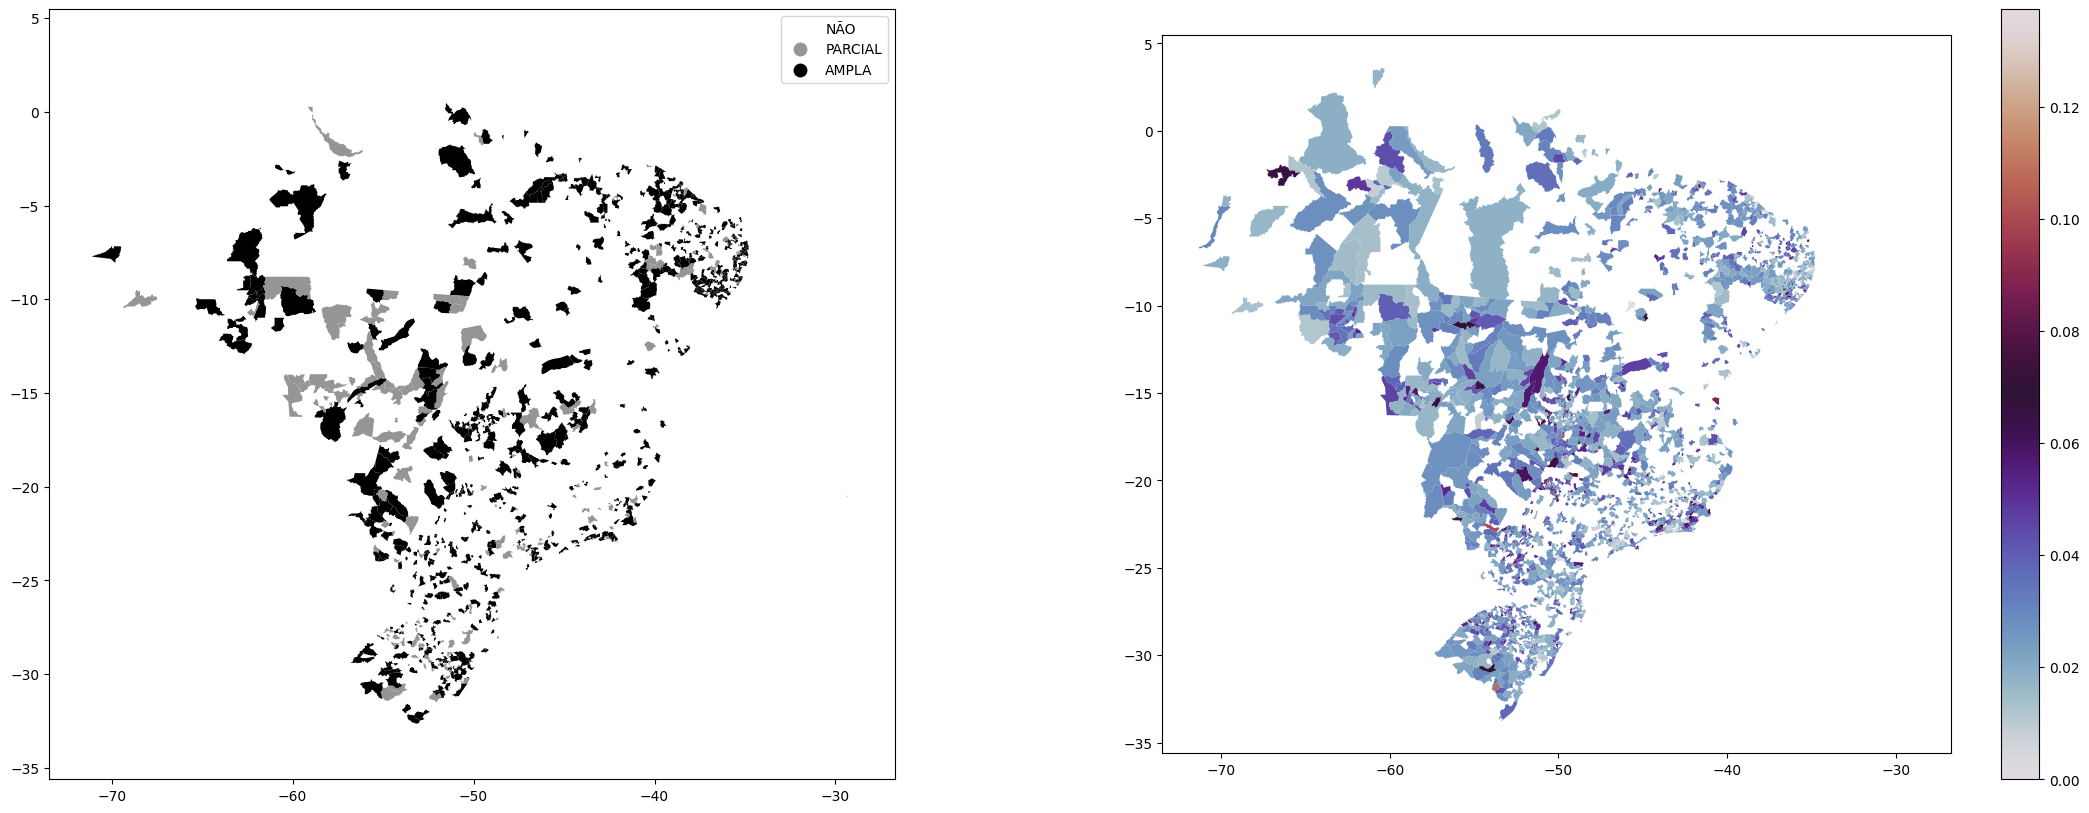

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(28,10))
# ax[0].set_title(f'teste', color='black', size=26)
# ax[1].set_title(f'teste 2', color='black', size=26)

geo_df.plot(column='Tipo de reforma', legend=True, cmap='Greys', ax=ax[0])
geo_df.plot(column='share_civil_service', legend=True, cmap='twilight', ax=ax[1]);

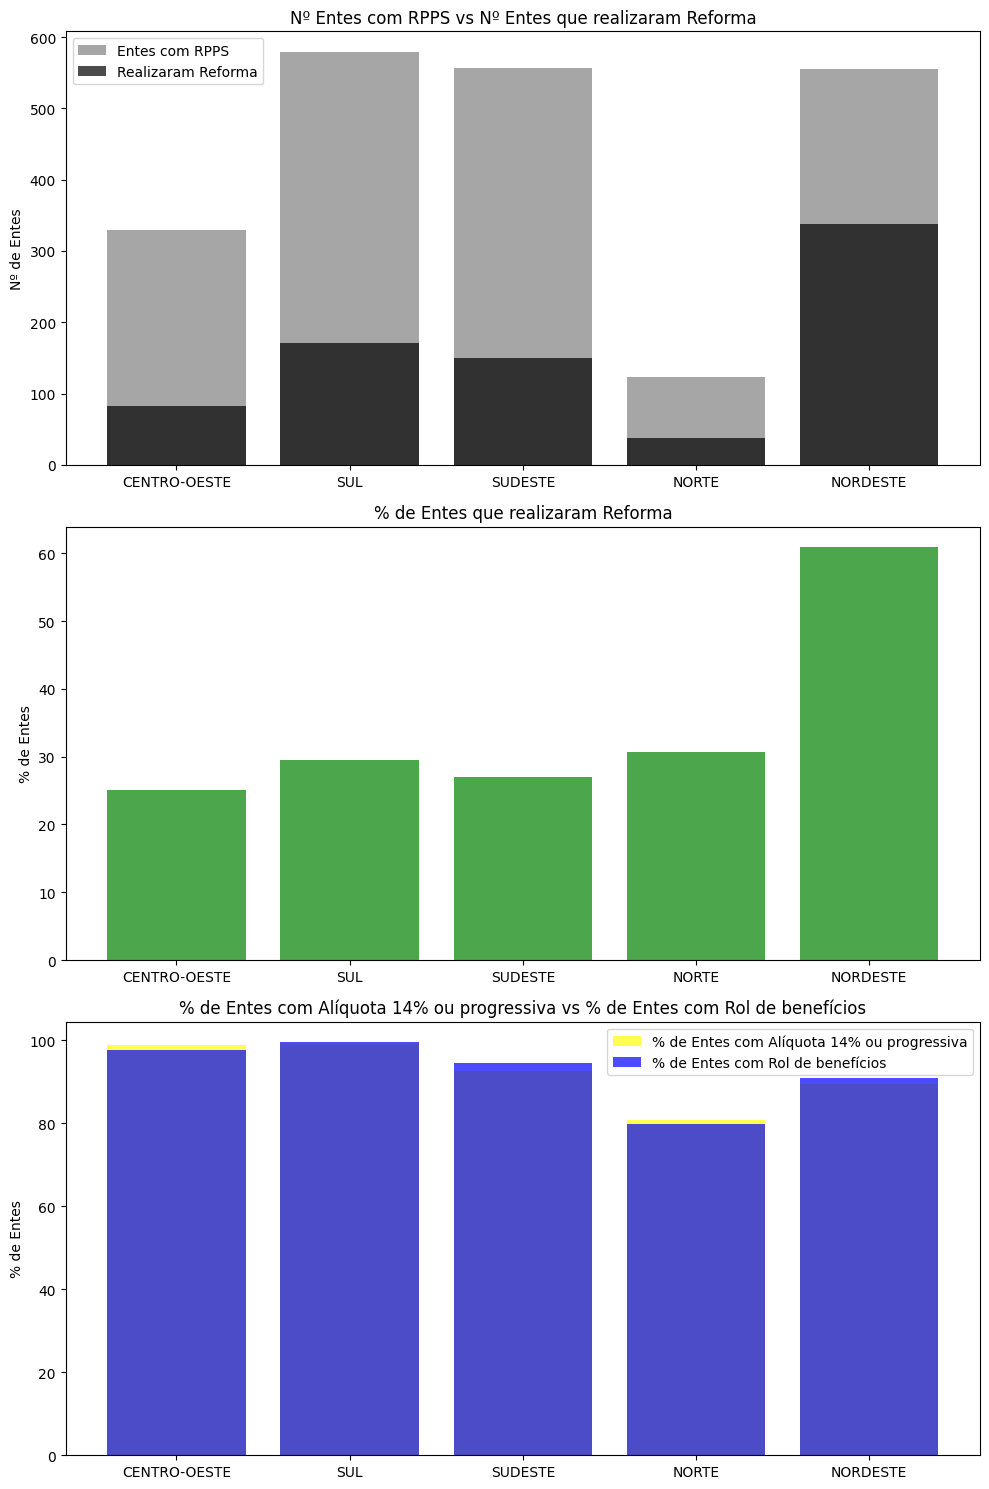

In [ ]:
# Data provided by the user
regions = ['CENTRO-OESTE', 'SUL', 'SUDESTE', 'NORTE', 'NORDESTE']
entes_rpps = [330, 579, 557, 124, 555]
entes_reform = [83, 171, 150, 38, 338]
percent_reform = [25.15, 29.53, 26.93, 30.65, 60.90]
percent_aliq_14 = [98.79, 98.96, 92.46, 80.65, 89.37]
percent_benefits = [97.58, 99.48, 94.43, 79.84, 90.81]

# Plotting the data
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Ajustando as cores para tons de cinza
axs[0].bar(regions, entes_rpps, color='gray', alpha=0.7, label='Entes com RPPS')
axs[0].bar(regions, entes_reform, color='black', alpha=0.7, label='Realizaram Reforma')
# Configurando o título e o rótulo do eixo y
axs[0].set_title('Nº Entes com RPPS vs Nº Entes que realizaram Reforma')
axs[0].set_ylabel('Nº de Entes')
# Colocando a legenda no topo à esquerda
axs[0].legend(loc='upper left')

# % de Entes que realizaram Reforma
axs[1].bar(regions, percent_reform, color='green', alpha=0.7)
axs[1].set_title('% de Entes que realizaram Reforma')
axs[1].set_ylabel('% de Entes')

# % de Entes com Alíquota dos segurados de 14% ou progressiva vs % de Entes com Rol de benefícios: aposentadoria e pensão
axs[2].bar(regions, percent_aliq_14, color='yellow', alpha=0.7, label='% de Entes com Alíquota 14% ou progressiva')
axs[2].bar(regions, percent_benefits, color='blue', alpha=0.7, label='% de Entes com Rol de benefícios')
axs[2].set_title('% de Entes com Alíquota 14% ou progressiva vs % de Entes com Rol de benefícios')
axs[2].set_ylabel('% de Entes')
axs[2].legend()

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

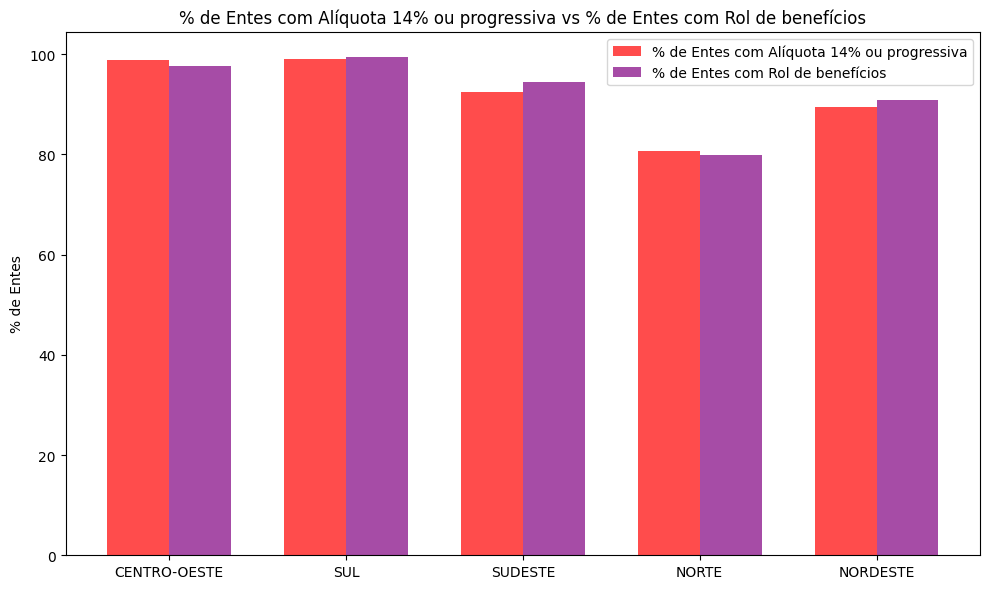

In [ ]:
# Plotting the data with bars side by side for the third graph
fig, ax = plt.subplots(figsize=(10, 6))

# Set the width of the bars
bar_width = 0.35
index = range(len(regions))

# Plot bars side by side
bar1 = ax.bar(index, percent_aliq_14, bar_width, color='red', alpha=0.7, label='% de Entes com Alíquota 14% ou progressiva')
bar2 = ax.bar([i + bar_width for i in index], percent_benefits, bar_width, color='purple', alpha=0.7, label='% de Entes com Rol de benefícios')

# Add titles and labels
ax.set_title('% de Entes com Alíquota 14% ou progressiva vs % de Entes com Rol de benefícios')
ax.set_ylabel('% de Entes')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(regions)
ax.legend()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [ ]:
# Dados
data = {
    "Medida Estatística": ["N", "Média", "D.P.", "Min.", "Máx."],
    "REGULARIDADE_2019": [2086, 0.589873, 0.376143, 0.000000, 1.000000],
    "INFORMAÇÕES_2019": [2086, 0.747743, 0.304562, 0.000000, 1.000000],
    "SUFICIÊNCIA_2019": [2086, 6.407469, 188.194866, 0.000000, 8465.450000],
    "ACUMULAÇÃO_RECURSOS_2019": [2086, 1.047554, 6.146911, -3.620300, 249.950920],
    "COBERTURA_PREVIDENCIÁRIA_2019": [2086, 0.208941, 0.269625, 0.000000, 1.640100],
    "avg_age": [2086, 32.019650, 3.254612, 21.108461, 42.706786],
    "avg_household_income_per_capita": [2086, 1.088011, 0.498395, 0.249173, 3.836660],
    "avg_income_pension_over_65": [2086, 731.069324, 257.573384, 304.617647, 4521.380952],
    "populacao": [2086, 70386.7814, 353867.919215, 776.0, 12325232.0],
    "share_civil_service": [2086, 0.030672, 0.014932, 0.000000, 0.137421],
    "share_other_employees": [2086, 0.016096, 0.013987, 0.000000, 0.131564],
    "IFGF": [2086, 0.595172, 0.182701, 0.062600, 0.986750],
    "IFGFPessoal": [2086, 0.656232, 0.289134, 0.000000, 1.000000],
}

# Criar o DataFrame
df_descr = pd.DataFrame(data)

# Gerando a tabela em formato HTML
html_table = df_descr.to_html(index=False)

# # Salvando a tabela HTML em um arquivo
# file_path_html = "/mnt/data/tabela_estatistica_descritiva_pt.html"
# with open(file_path_html, "w") as file:
#     file.write(html_table)

# file_path_html